**drive password:** 4/1AY0e-g4MQ99ZUaei9gRegTrcTCuMqEjs_Z_Hef4V9rYl3QQSusocAWrax4E

# Leer CSV

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("/content/gdrive/MyDrive/data/diabetic_data.csv")

df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Analisis estadistico

Como podemos ver tiene 50 columnas y filas 101766 filas. Esto es tiene info de 101766 pacientes y tiene recopilado 50 caracteristicas diferentes

In [ ]:
df.shape

(101766, 50)

In [ ]:
def show_distribucion(x_label,y_label,title,x_values,y_values):
  fig=plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(x_values,y_values)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()


In [ ]:
def imprimir_donut(columna,title=""):
  colors = ['#F92969','#FACA0C','#17C37B','#D9DFEB']
  size_of_groups=columna.value_counts().tolist()
  my_pie,_,_ = plt.pie(size_of_groups,radius = 2.3,colors=colors,autopct="%.1f%%",labels=columna.value_counts().index.tolist())
  plt.setp(my_pie, width=1.5, edgecolor='white') # 

  plt.legend(loc="best")
  #plt.title(title,loc="best")
  plt.show()

In [ ]:
import docx
def guardarTabla(df_word):
  """
  Funcion que guarda un dataframe en word
  """
  doc = docx.Document('/content/gdrive/MyDrive/data/test.docx')
  # add a table to the end and create a reference variable
  # extra row is so we can add the header row
  t = doc.add_table(df_word.shape[0]+1, df_word.shape[1])

  # add the header rows.
  for j in range(df_word.shape[-1]):
      t.cell(0,j).text = df_word.columns[j]

  # add the rest of the data frame
  for i in range(df_word.shape[0]):
      for j in range(df_word.shape[-1]):
          t.cell(i+1,j).text = str(df_word.values[i,j])

  # save the doc
  doc.save('/content/gdrive/MyDrive/data/test.docx')

ModuleNotFoundError: ignored

#### Distribución de los reingresos

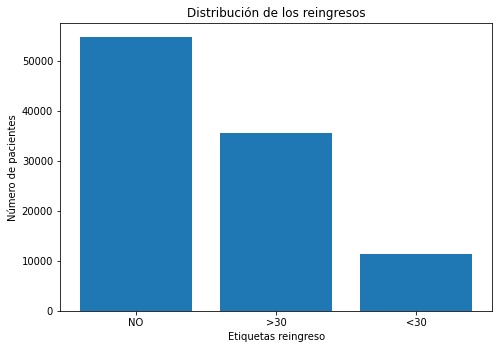

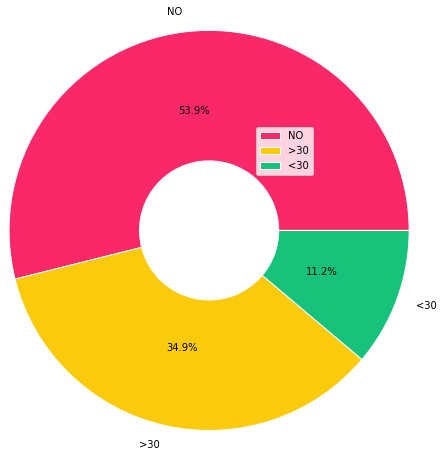

In [ ]:
show_distribucion("Etiquetas reingreso","Número de pacientes","Distribución de los reingresos",df["readmitted"].value_counts().index.tolist(),df["readmitted"].value_counts().tolist())
imprimir_donut(df["readmitted"],"Distribución de los reingresos")

In [ ]:
df["readmitted"].value_counts().to_frame().T

,NO,>30,<30
readmitted,54864,35545,11357


#### Distribución por raza

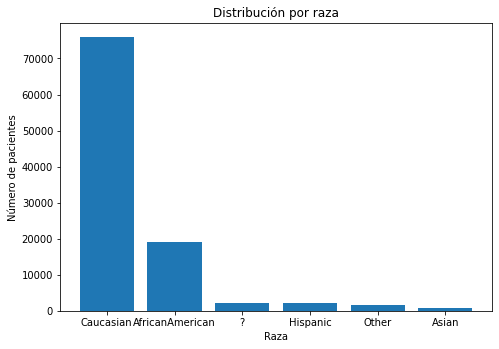

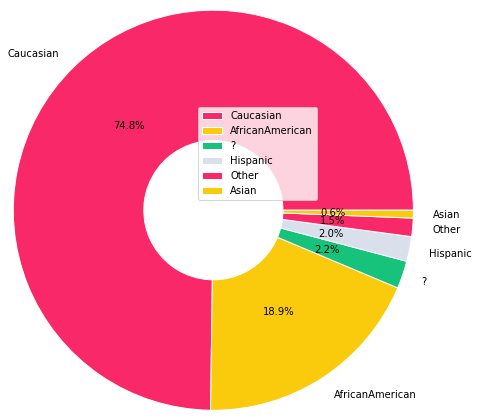

In [ ]:
show_distribucion("Raza","Número de pacientes","Distribución por raza",df["race"].value_counts().index.tolist(),df["race"].value_counts().tolist())
imprimir_donut(df["race"],"Distribución de los reingresos")

In [ ]:
df["race"].value_counts().to_frame().T

,Caucasian,AfricanAmerican,?,Hispanic,Other,Asian
race,76099,19210,2273,2037,1506,641


#### Distribución por sexo

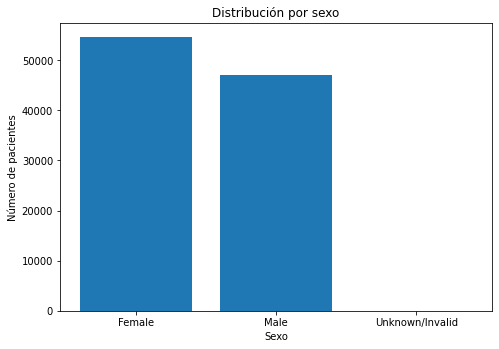

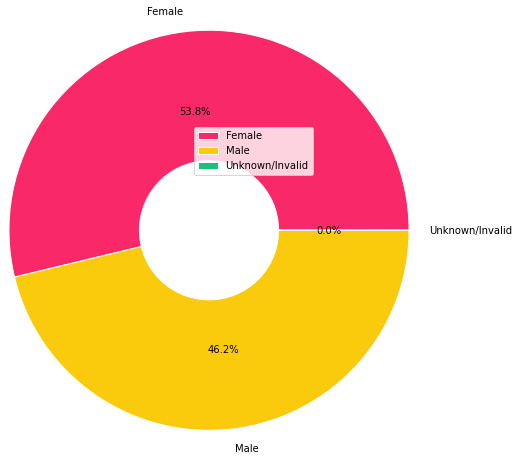

In [ ]:
show_distribucion("Sexo","Número de pacientes","Distribución por sexo",df["gender"].value_counts().index.tolist(),df["gender"].value_counts().tolist())
imprimir_donut(df["gender"],"Distribución por sexo")

In [ ]:
df["gender"].value_counts().to_frame().T

,Female,Male,Unknown/Invalid
gender,54708,47055,3


#### Distribución por edad

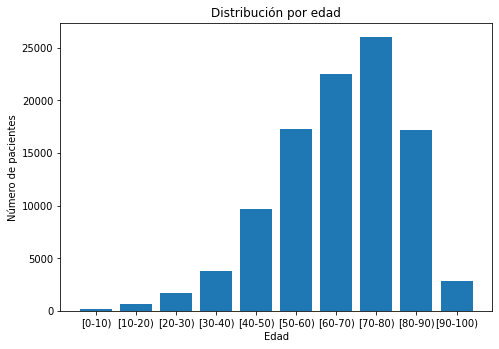

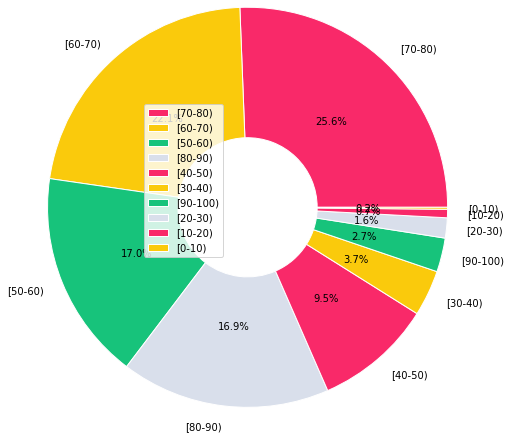

In [ ]:
a=df["age"].value_counts().sort_values(axis="index")
sex_valcont=a[0:3].append(a[4:6]).append(a[7:11]).append(a[6:7]).append(a[3:4])
show_distribucion("Edad","Número de pacientes","Distribución por edad",sex_valcont.index.tolist(),sex_valcont.tolist())

imprimir_donut(df["age"],"Distribución por sexo")

In [ ]:
sex_valcont.to_frame().T

,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
age,161,691,1657,3775,9685,17256,22483,26068,17197,2793


#### Distribución numero de visitas al anbulatorio

In [ ]:
def calculos(df_copy,columna):
  kont5=0
  kont10=0
  kontMax=0
  lista=[]
  for i in range(0,len(df_copy)):
    val=df_copy[columna][i]
    if val<3:
     lista.append("0-2")
    elif val<6:
      lista.append("3-5")
    elif val<11:
      lista.append("6-10")  
    else:
      lista.append("+10")
  return lista

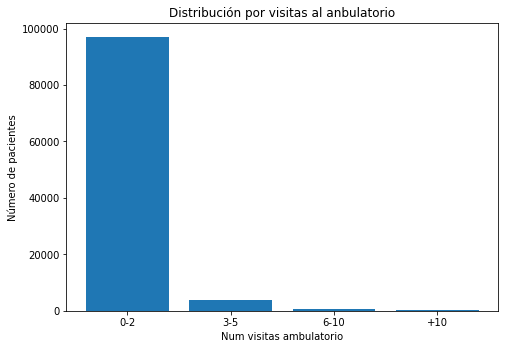

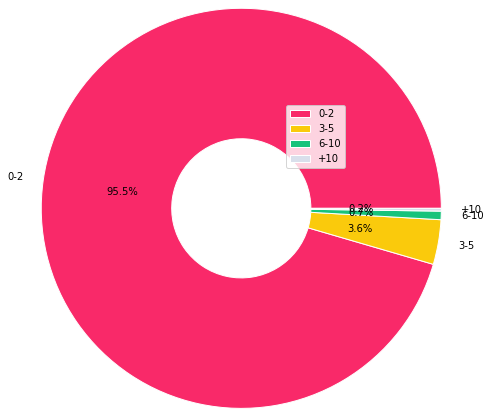

,0-2,3-5,6-10,+10
number_outpatient,97168.00,3674.00,696.00,228.00
porcentaje (%),95.48,3.61,0.68,0.22


In [ ]:
list_numOut=calculos(df.copy(),"number_outpatient")
df_numOut=pd.DataFrame(columns=["number_outpatient"])
df_numOut["number_outpatient"]=list_numOut
show_distribucion("Num visitas ambulatorio","Número de pacientes","Distribución por visitas al anbulatorio",df_numOut["number_outpatient"].value_counts().index.tolist(),df_numOut["number_outpatient"].value_counts().tolist())
imprimir_donut(df_numOut["number_outpatient"],"Distribución por visitas al anbulatorio")

df_nuevo=df_numOut["number_outpatient"].value_counts().to_frame()
df_nuevo["number_outpatient"]=df_nuevo["number_outpatient"].round()
df_nuevo["porcentaje (%)"]=[round(100*a/ df_nuevo["number_outpatient"].sum(),2) for a in df_nuevo["number_outpatient"].tolist()]
df_nuevo=df_nuevo.T
df_nuevo

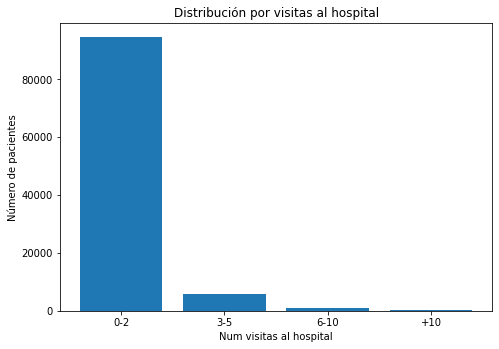

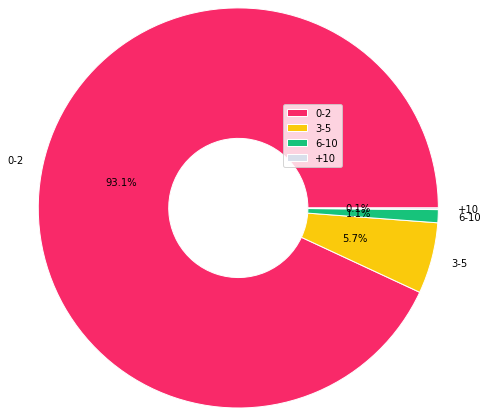

,0-2,3-5,6-10,+10
number_inpatient,94717.00,5845.00,1071.00,133.00
porcentaje (%),93.07,5.74,1.05,0.13


In [ ]:
list_numIn=calculos(df.copy(),"number_inpatient")
df_numOut=pd.DataFrame(columns=["number_inpatient"])
df_numOut["number_inpatient"]=list_numIn
show_distribucion("Num visitas al hospital","Número de pacientes","Distribución por visitas al hospital",df_numOut["number_inpatient"].value_counts().index.tolist(),df_numOut["number_inpatient"].value_counts().tolist())
imprimir_donut(df_numOut["number_inpatient"],"Distribución por visitas al anbulatorio")
df_nuevo=df_numOut["number_inpatient"].value_counts().to_frame()
df_nuevo["porcentaje (%)"]=[round(100*a/ df_nuevo["number_inpatient"].sum(),2) for a in df_nuevo["number_inpatient"].tolist()]
df_nuevo=df_nuevo.T
df_nuevo


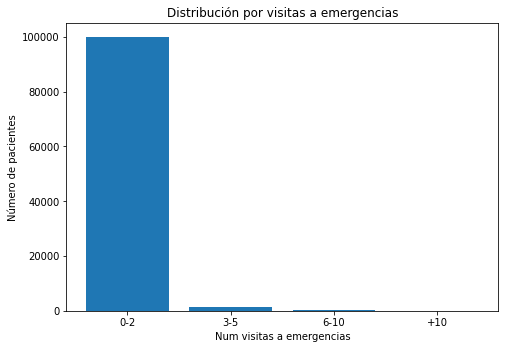

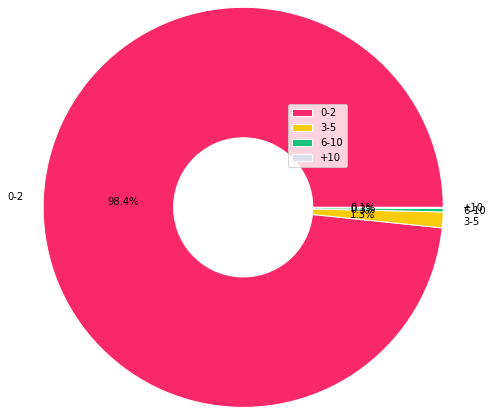

,0-2,3-5,6-10,+10
number_emergency,100102.00,1291.00,284.00,89.00
porcentaje (%),98.36,1.27,0.28,0.09


In [ ]:

list_numEm=calculos(df.copy(),"number_emergency")
df_numOut=pd.DataFrame(columns=["number_emergency"])
df_numOut["number_emergency"]=list_numEm
show_distribucion("Num visitas a emergencias","Número de pacientes","Distribución por visitas a emergencias",df_numOut["number_emergency"].value_counts().index.tolist(),df_numOut["number_emergency"].value_counts().tolist())
imprimir_donut(df_numOut["number_emergency"],"Distribución por visitas a emergencias")

df_nuevo=df_numOut["number_emergency"].value_counts().to_frame()
df_nuevo["porcentaje (%)"]=[round(100*a/ df_nuevo["number_emergency"].sum(),2) for a in df_nuevo["number_emergency"].tolist()]
df_nuevo=df_nuevo.T
df_nuevo

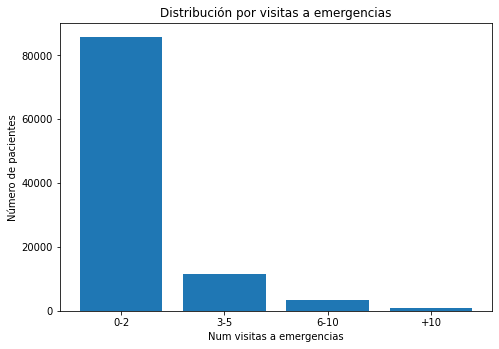

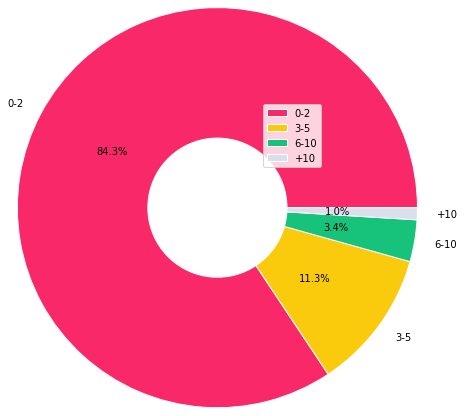

,0-2,3-5,6-10,+10
number_total,85831.00,11510.00,3435.00,990.00
porcentaje (%),84.34,11.31,3.38,0.97


In [ ]:



lista_total=[df["number_emergency"][i]+df["number_inpatient"][i]+df["number_outpatient"][i] for i in range(0,len(df["number_inpatient"]))]

df_numOut=pd.DataFrame(columns=["number_total"])
df_numOut["number_total"]=lista_total
list_total=calculos(df_numOut,"number_total")
df_numOut=pd.DataFrame(columns=["number_total"])
df_numOut["number_total"]=list_total
show_distribucion("Num visitas a centros de salud","Número de pacientes","Distribución por visitas a centros de salud",df_numOut["number_total"].value_counts().index.tolist(),df_numOut["number_total"].value_counts().tolist())
imprimir_donut(df_numOut["number_total"],"Distribución por visitas a centros de salud")

df_nuevo=df_numOut["number_total"].value_counts().to_frame()
df_nuevo["porcentaje (%)"]=[round(100*a/ df_nuevo["number_total"].sum(),2) for a in df_nuevo["number_total"].tolist()]
df_nuevo=df_nuevo.T
#guardarTabla(df_nuevo)
df_nuevo


###Distribuciones pro

In [ ]:
def show_distribucion3(x_label,y_label,title,bar_width,index, values,textos,labels2):
  #configuramos el plot
  fig,ax=plt.subplots()
  n_data=3
  index=np.array(index)
  num=2
  colors=["r","g","b","c","m","y","k","w","bisque","lime"]
  vals=[values[i:i+3] for i in range(0,len(values),3)]

  for i in range(0,len(vals)):
    rects1 = plt.bar(index+i*bar_width,vals[i],bar_width,color=colors[i],label=textos[i])
  
  plt.xlabel(x_label )
  plt.ylabel(y_label)
  plt.title(title)
  plt.xticks(index+num/2*bar_width,tuple(labels2))
  plt.legend()

  plt.tight_layout
  plt.show


In [ ]:
def dibujar(axes,values,titles,fig,labels2):
  colors = ['#F92969','#FACA0C','#17C37B','#D9DFEB']  
  vals=[values[i:i+3] for i in range(0,len(values),3)] 
  for i in range(0,len(vals)):
    ax=axes[i]
    size_of_groups=vals[i]
    my_pie,_,_ = ax.pie(size_of_groups,radius = 1.5,colors=colors,autopct="%.1f%%",labels=labels2,labeldistance=None)
    plt.setp(my_pie, width=0.8, edgecolor='white')  
    #ax.legend(loc="center")
    ax.set_title(titles[i],loc="left", fontweight ="bold", fontsize = 14)
    ax.plot()
  
  handles, labels = ax.get_legend_handles_labels()

  fig.legend(handles, labels, loc="best")
  plt.show()

#### Distribucion de los reingresos en cuanto al sexo

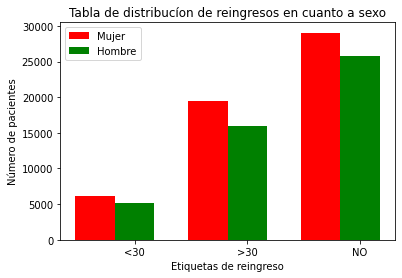

In [ ]:
df_readm_sex=df.groupby(["gender","readmitted"]).count()
values=tuple(list(df_readm_sex["encounter_id"]))
labels2=[df_readm_sex.index[a][1] for a in range(0,3)]
show_distribucion3("Etiquetas de reingreso","Número de pacientes","Tabla de distribucíon de reingresos en cuanto a sexo",0.35,[0,1,2],values[0:6],["Mujer","Hombre"],labels2)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


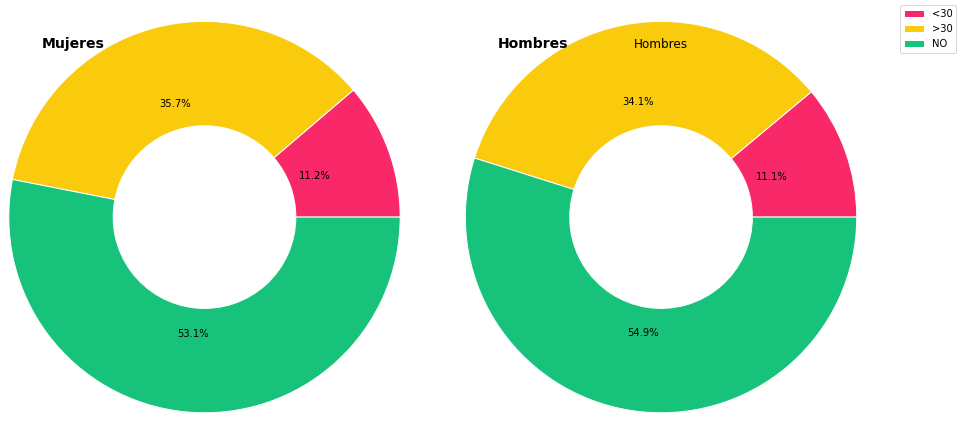

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.set_title("Mujeres",loc="left", 
             fontweight ="bold", fontsize = 14)
ax2.set_title("Hombres")
axes=[ax1,ax2]
dibujar(axes,values[0:6],["Mujeres","Hombres"],fig,labels2)


#### Distribución de los reingresos en cuanto a la raza

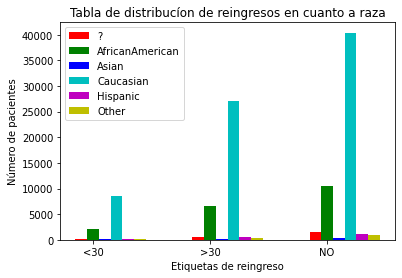

In [ ]:
df_readm_race=df.groupby(["race","readmitted"]).count()
values=tuple(list(df_readm_race["encounter_id"]))
labels=[df_readm_race.index[a*3][0] for a in range(0,6)]
labels2=[df_readm_race.index[a][1] for a in range(0,3)]
labelx="Etiquetas de reingreso"
labely="Número de pacientes"
title="Tabla de distribucíon de reingresos en cuanto a raza"
show_distribucion3(labelx,labely,title,0.2,[0,2,4],values,labels,labels2)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


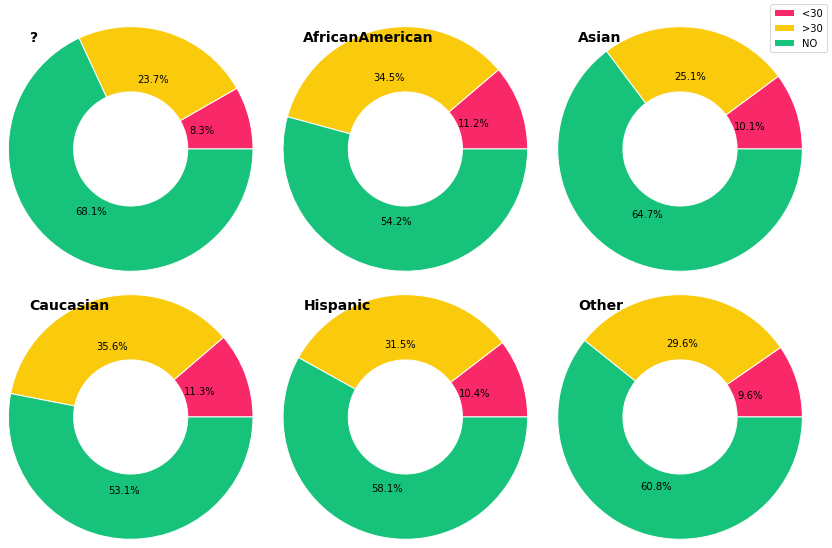

In [ ]:
fig, ((ax1, ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(12, 8))
fig.tight_layout(pad=4.0)
axes=[ax1, ax2,ax3,ax4,ax5,ax6]
dibujar(axes,values,labels,fig,labels2)

#### Distribucion de los reingresos en cuanto a edad

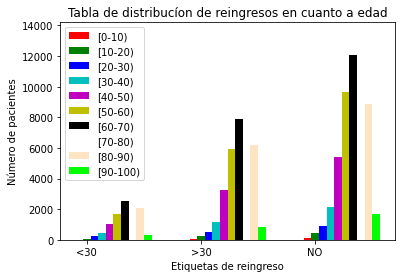

In [ ]:
df_readm_race=df.groupby(["age","readmitted"]).count()
values=tuple(list(df_readm_race["encounter_id"]))
labels=[df_readm_race.index[a*3][0] for a in range(0,10)]
labels2=[df_readm_race.index[a][1] for a in range(0,3)]

labelx="Etiquetas de reingreso"
labely="Número de pacientes"
title="Tabla de distribucíon de reingresos en cuanto a edad"
show_distribucion3(labelx,labely,title,0.2,[0,3,6],values, labels,labels2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


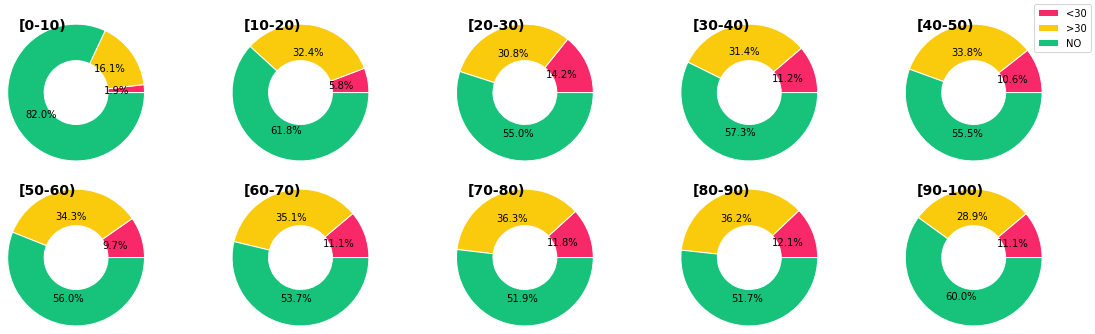

In [ ]:
fig, ((ax1, ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2, 5, figsize=(16, 5))
fig.tight_layout(pad=3.0)
axes=[ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]
dibujar(axes,values,labels,fig,labels2)

#### Distribucion de las visitas hospital/emergencia ambulatorias en cuanto a reingreso

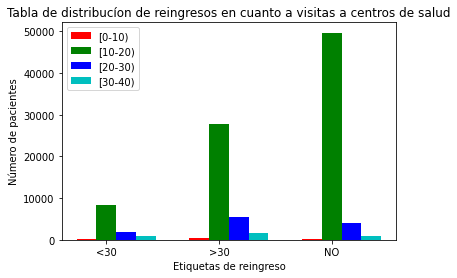

In [ ]:
df_copia=df.copy()
df_copia["intervalo"]=list_total

df_readm_sex=df_copia.groupby(["intervalo","readmitted"]).count()
values=tuple(list(df_readm_sex["encounter_id"]))
labels=[df_readm_race.index[a*3][0] for a in range(0,4)]

labels2=[df_readm_sex.index[a][1] for a in range(0,3)]
show_distribucion3("Etiquetas de reingreso","Número de pacientes","Tabla de distribucíon de reingresos en cuanto a visitas a centros de salud",0.35,[0,2,4],values,labels,labels2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


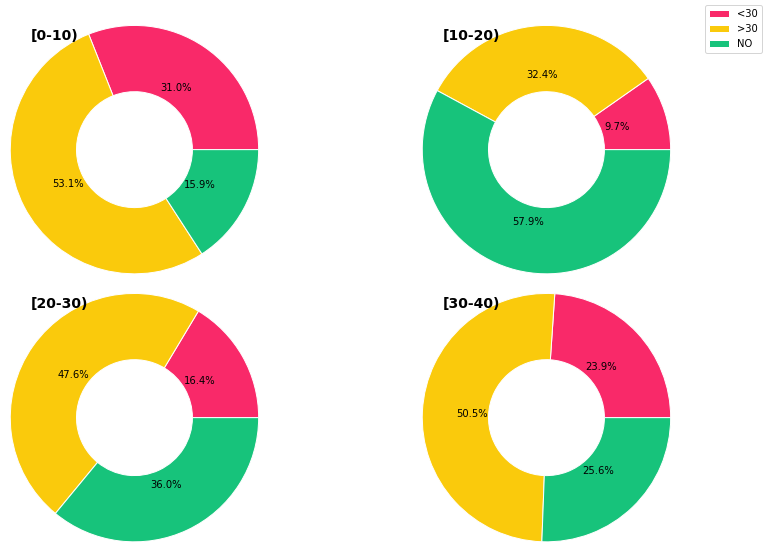

In [ ]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=4.0)
axes=[ax1, ax2,ax3,ax4]
dibujar(axes,values,labels,fig,labels2)

Diferentes categorias de las variables categoricas:

In [ ]:
cat_cols = df.select_dtypes(include=['category', object])
for column in cat_cols.columns:
     print("\n" + column)
     print(cat_cols[column].value_counts())


race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

medical_special

## Matriz de correlaciones

  A continuación se visualiza la matriz de correlaciones de las variables numericas. Como se puede ver no existe ninguna correlacion mayor que 0.75 entre las variables.

[Text(0.5, 0, 'encounter_id'),
 Text(1.5, 0, 'patient_nbr'),
 Text(2.5, 0, 'admission_type_id'),
 Text(3.5, 0, 'discharge_disposition_id'),
 Text(4.5, 0, 'admission_source_id'),
 Text(5.5, 0, 'time_in_hospital'),
 Text(6.5, 0, 'num_lab_procedures'),
 Text(7.5, 0, 'num_procedures'),
 Text(8.5, 0, 'num_medications'),
 Text(9.5, 0, 'number_outpatient'),
 Text(10.5, 0, 'number_emergency'),
 Text(11.5, 0, 'number_inpatient'),
 Text(12.5, 0, 'number_diagnoses')]

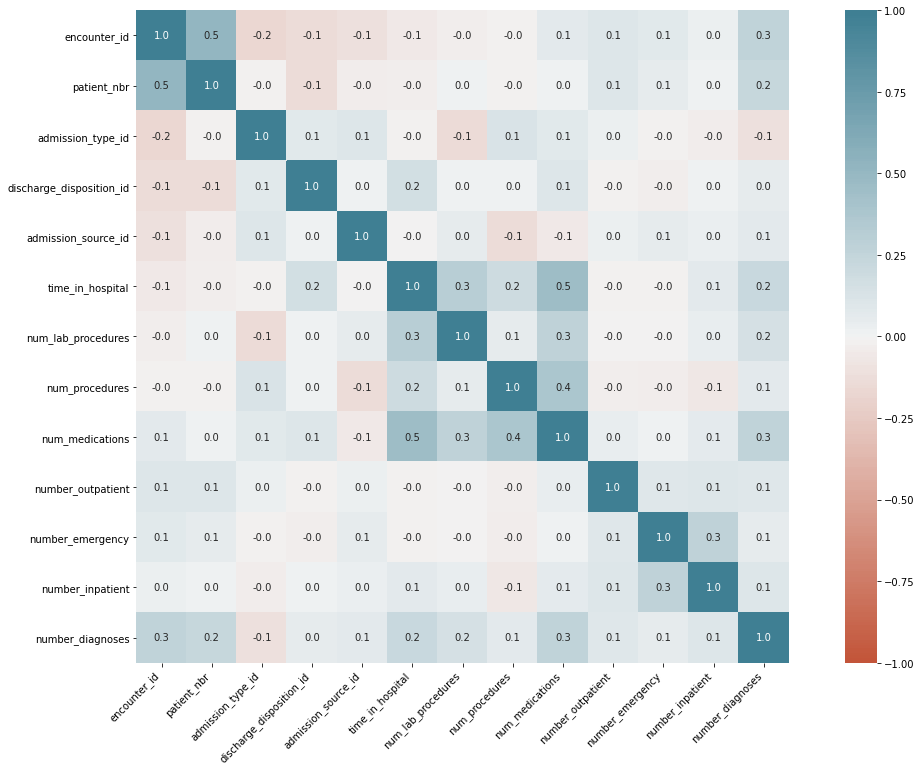

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".1f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

race,?,AfricanAmerican,Asian,Caucasian,Hispanic,Other
gender,,,,,,
Female,1133,11728,318,39689,1092,748
Male,1138,7482,323,36410,945,757
Unknown/Invalid,2,0,0,0,0,1


In [ ]:
 a=df.loc[:, df.dtypes == object]
a = a.astype('category')

In [ ]:
aux = corr.unstack()
matrizCorrMax = aux[aux>=0.75]
matrizCorrMax = matrizCorrMax.drop_duplicates()
matrizCorrMax = matrizCorrMax[matrizCorrMax != 1]
matrizCorrMax

Series([], dtype: float64)

## Analisis de valores faltantes

En esta sección se realiza el análisis de valores faltantes. Se puede ver que no existe ningun dato que contenga el valor Nan. Aun asi, existen valores None y ? que expresan que ese dato no esta definido. Como vemos no existe ningun ejemplo que contenga todas las columnas completas.

In [ ]:
nanColumns=df.columns[df.isna().any()]
print("numero de columnas qeu tiene valor Nan: ",nanColumns.shape[0])


numero de columnas qeu tiene valor Nan:  0


In [ ]:
pr=(df == '?').any(axis=1)
df_noNone=df[~pr]
df_noNone
print("numero de filas que no tienen ninguna columna con valor ?", df_noNone.shape[0])
print("numero de filas que no tienen ninguna columna con valor None", df[~((df == 'None').any(axis=1))].shape[0])
pr2=(df_noNone == 'None').any(axis=1)
df_noNone2=df_noNone[~pr2]
print("numero de filas que no tienen ninguna columna con valor None o ?", df_noNone2.shape[0])



numero de filas que no tienen ninguna columna con valor ? 1043
numero de filas que no tienen ninguna columna con valor None 298
numero de filas que no tienen ninguna columna con valor None o ? 0


Como se puede ver en la siguiente linea de codigo existen 3 columnas que tienen una media mayor que 0.1 de valores faltantes.  
* Como se puede ver casi todos los datos no contienen el valor del peso, en consecuencia esta columna va a ser eliminada.  
* La columna payer_code tambien ha sido borrada. Esto ha sido porque existen muchos valores faltantes y porque no es un atributo muy relevante a la hora de predecir el reingreso hospitalario ya que el metodo de pago no suele influir en la salud.
* 


In [ ]:
NanColumns=df.columns[(df == '?').mean() > 0.1]
for col in NanColumns:
  print(col, ":",(df[col] == '?').mean())

weight : 0.9685847925633315
payer_code : 0.395574160328597
medical_specialty : 0.49082208203132677


In [ ]:
#NanMean=((df == '?') | (df == 'None')).mean()
NanMean=(df == '?').mean()
NanMean[NanMean>0]

race                 0.022336
weight               0.968585
payer_code           0.395574
medical_specialty    0.490822
diag_1               0.000206
diag_2               0.003518
diag_3               0.013983
dtype: float64

In [ ]:
          
NanColumns=df.columns[(df == '?').sum()>0]
for col in NanColumns:
  val1=col, ":",(df[col] == '?').sum()
  val2=val1[2]/df.shape[0]
  print(col, ":",val1," ",val2)
  print()

race : ('race', ':', 2273)   0.022335554114340742

weight : ('weight', ':', 98569)   0.9685847925633315

payer_code : ('payer_code', ':', 40256)   0.395574160328597

medical_specialty : ('medical_specialty', ':', 49949)   0.49082208203132677

diag_1 : ('diag_1', ':', 21)   0.0002063557573256294

diag_2 : ('diag_2', ':', 358)   0.0035178743391702533

diag_3 : ('diag_3', ':', 1423)   0.013983059174970029



In [ ]:
df.shape[0]


101766

In [ ]:
df.shape[0]

101766